## DataLoaders

- Dataset is fed into the network during training.
- Gluon provides a dataloader API, followed in data from a dataset and returning minibatches of data.
- The dataloader is essentially an iterator which goes through our entire dataset, minibatch by minibatch until all of the dataset samples have been used during training, signaling the end of one epoch.
- To train neural networks, we typically repeat multiple epochs until convergence of the network parameters.

### Basic Usage

In [1]:
import mxnet as mx

from mxnet import gluon, nd
from matplotlib.pyplot import imshow
%matplotlib inline

### Dataset

using the toy dataset filled with draws from a random uniform distribution

In [2]:
mx.random.seed(42)
X = mx.random.uniform(shape=(10, 3))
y = mx.random.uniform(shape=(10, 1))
dataset = gluon.data.dataset.ArrayDataset(X, y)

### DataLoader

A DataLoader is used to create mini-batches of samples from a Dataset, and provides a convenient iterator interface for looping these batches.

- The gluon dataloader wraps around the gluon datasets to create minibatches of samples from the dataset.
- It provides a convenient iterator interface for looping through data.
- Internally the dataloader uses a batch sampler that returns a batch or random indices to be retrieved from the dataset.
- A required parameter of dataloader is the size of the minibatches you want to create, called `batch_size`.

In [3]:
data_loader = gluon.data.DataLoader(dataset, batch_size=5, last_batch='keep')

for X_batch, y_batch in data_loader:
    print(f'X_batch has shape {X_batch.shape}, and y_batch has shape {y_batch.shape}')

X_batch has shape (5, 3), and y_batch has shape (5, 1)
X_batch has shape (5, 3), and y_batch has shape (5, 1)


We see that iterating over the dataset produces minibatches of five and the loop ends after two iterations. Since we have just 10 data points in our dataset. Sometimes the dataset length is indivisible by the minibatch size, leaving a final batch with a smaller number of samples. Dataloaders default behavior is to return this smaller minibatch but this can be changed by setting the `last_batch` parameter to `discard`, which ignores the last batch or roll-over which starts the next epoch with the remaining samples. 

### Parallel Data Loading

DataLoader allows loading data in parallel for maximum performance

One great benefit of using dataloader is the ability to easily load data in parallel using multiprocessing. You can set the non-workers
parameter to the number of CPUs available on your machine for maximum performance or limited to a lower number to keep resources free. 

In [4]:
from multiprocessing import cpu_count
CPU_COUNT = cpu_count()

data_loader = gluon.data.DataLoader(dataset, batch_size=5, num_workers=CPU_COUNT)

for X_batch, y_batch in data_loader:
    print(f'X_batch has shape {X_batch.shape}, and y_batch has shape {y_batch.shape}')

X_batch has shape (5, 3), and y_batch has shape (5, 1)
X_batch has shape (5, 3), and y_batch has shape (5, 1)


In [5]:
CPU_COUNT

8

### Lazy Transformations

We can lazily apply transformations on the dataset when creating the dataloader and set the dataset to be shuffled. The transformations are applied while fetching the data batch. 

In [7]:
from mxnet.gluon.data.vision import transforms

train_dataset = gluon.data.vision.datasets.MNIST(train=True)
# Here, we import the provider gluon transform submodule and compose two different data transformations, a random horizontal flip and a random vertical flip.
transform = transforms.Compose([transforms.RandomFlipTopBottom(),
                                transforms.RandomFlipLeftRight()])

In [8]:
# The dataloader constructor also accepts a shuffle argument to shuffle our training data and break any spurious relationships in the order we encounter data samples during training.
train_dataloader = gluon.data.DataLoader(train_dataset.transform_first(transform), batch_size=5, shuffle=True)

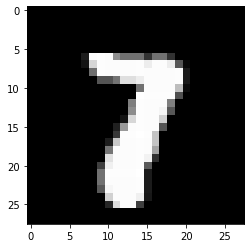

In [9]:
for X_batch, y_batch in train_dataloader:
    imshow(X_batch[3,:,:,0].asnumpy(), cmap='gray')
    break